In [1]:
import tensorflow as tf
from keras.models import load_model
from keras.preprocessing import image
from sklearn.metrics import f1_score, classification_report, confusion_matrix
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns
from config import model_train_dir, model_test_dir

In [3]:
IMAGE_SIZE = (224, 224)
BATCH_SIZE = 32

test_datagen = ImageDataGenerator(rescale=1.0 / 255)
test_generator = test_datagen.flow_from_directory(
    model_test_dir,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False,
    seed = 42
)

Found 666 images belonging to 19 classes.


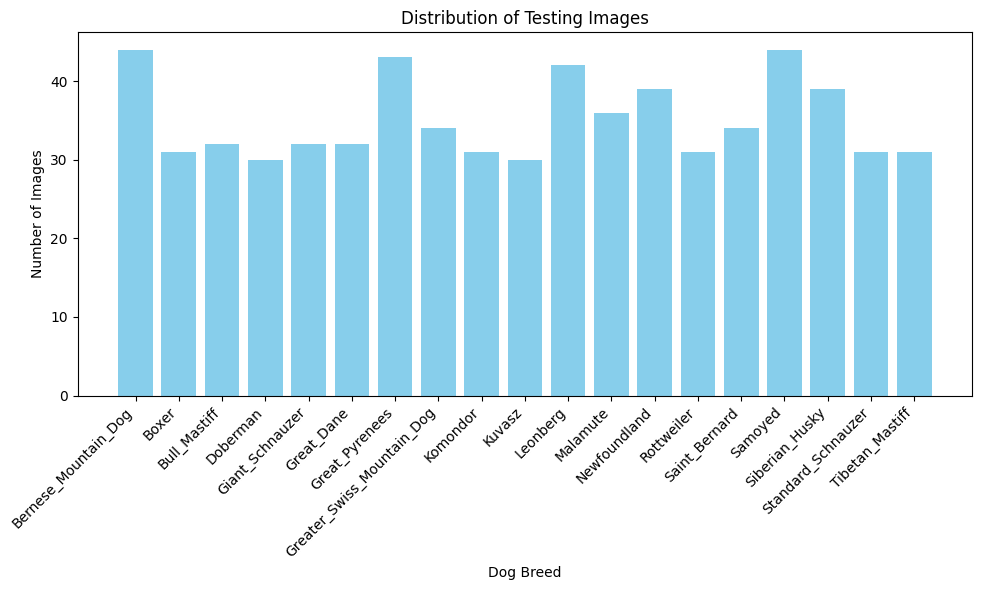

In [4]:
class_labels = list(test_generator.class_indices.keys())
class_labels = [label.split('-')[1].title() for label in class_labels]
class_counts = np.sum(test_generator.labels == np.arange(len(class_labels))[:, None], axis=1)

sorted_indices = np.argsort(class_labels)
sorted_class_labels = [class_labels[i] for i in sorted_indices]
sorted_class_counts = [class_counts[i] for i in sorted_indices]

plt.figure(figsize=(10, 6))
plt.bar(sorted_class_labels, sorted_class_counts, color='skyblue')
plt.xlabel('Dog Breed')
plt.ylabel('Number of Images')
plt.title('Distribution of Testing Images')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [5]:
model_loc = 'dog_breed_classifier_model_augmented.keras'
model = load_model(model_loc)
predictions = model.predict(test_generator)
predicted_labels = predictions.argmax(axis=1)
true_labels = test_generator.classes

/Users/skyglow/Documents/Coding/git/OMSA/.venv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


21/21 ━━━━━━━━━━━━━━━━━━━━ 13s 568ms/step


In [6]:
f1 = f1_score(true_labels, predicted_labels, average='weighted')
print("F1 Score:", f1)

F1 Score: 0.636641771690871


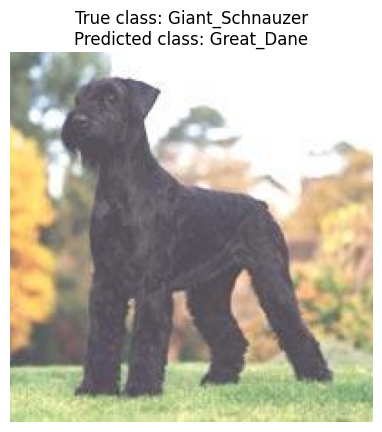

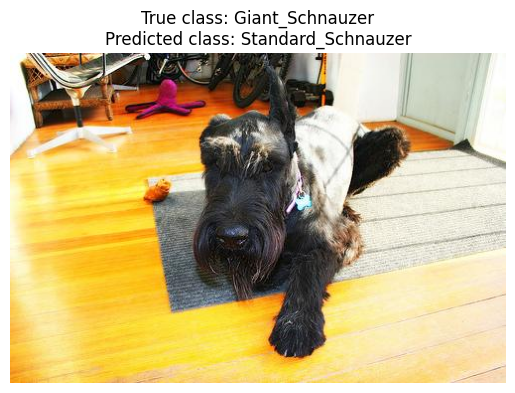

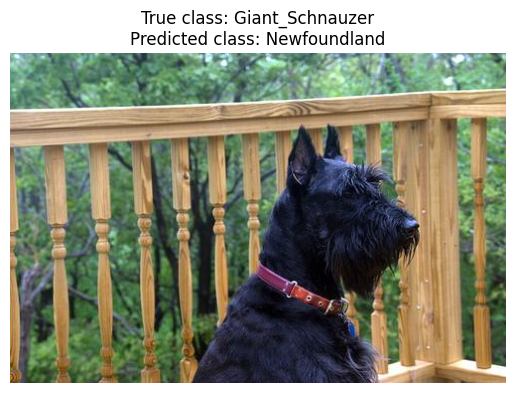

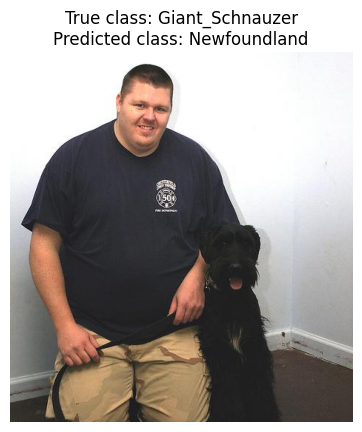

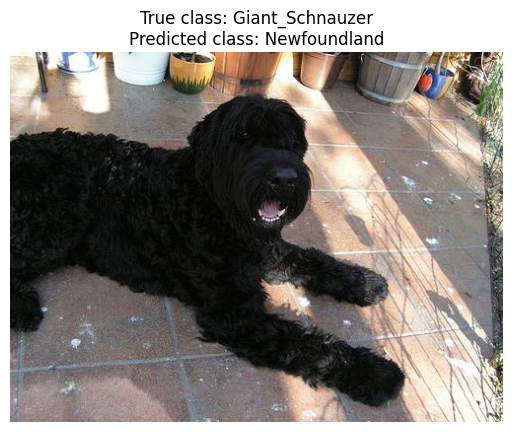

In [7]:
class_labels_2 = list(test_generator.class_indices.keys())
class_labels_2 = [label.split('-')[1].title() for label in class_labels_2]

misclassified_indices = np.where(predicted_labels != true_labels)[0]
# random.shuffle(misclassified_indices)

num_mispredictions_to_show = 5
for i in range(num_mispredictions_to_show):
    index = misclassified_indices[i]
    predicted_class = class_labels_2[predicted_labels[index]]
    true_class = class_labels_2[true_labels[index]]
    image_path = test_generator.filepaths[index]
    
    img = plt.imread(image_path)
    plt.imshow(img)
    plt.title(f"True class: {true_class}\nPredicted class: {predicted_class}")
    plt.axis('off')
    plt.show()

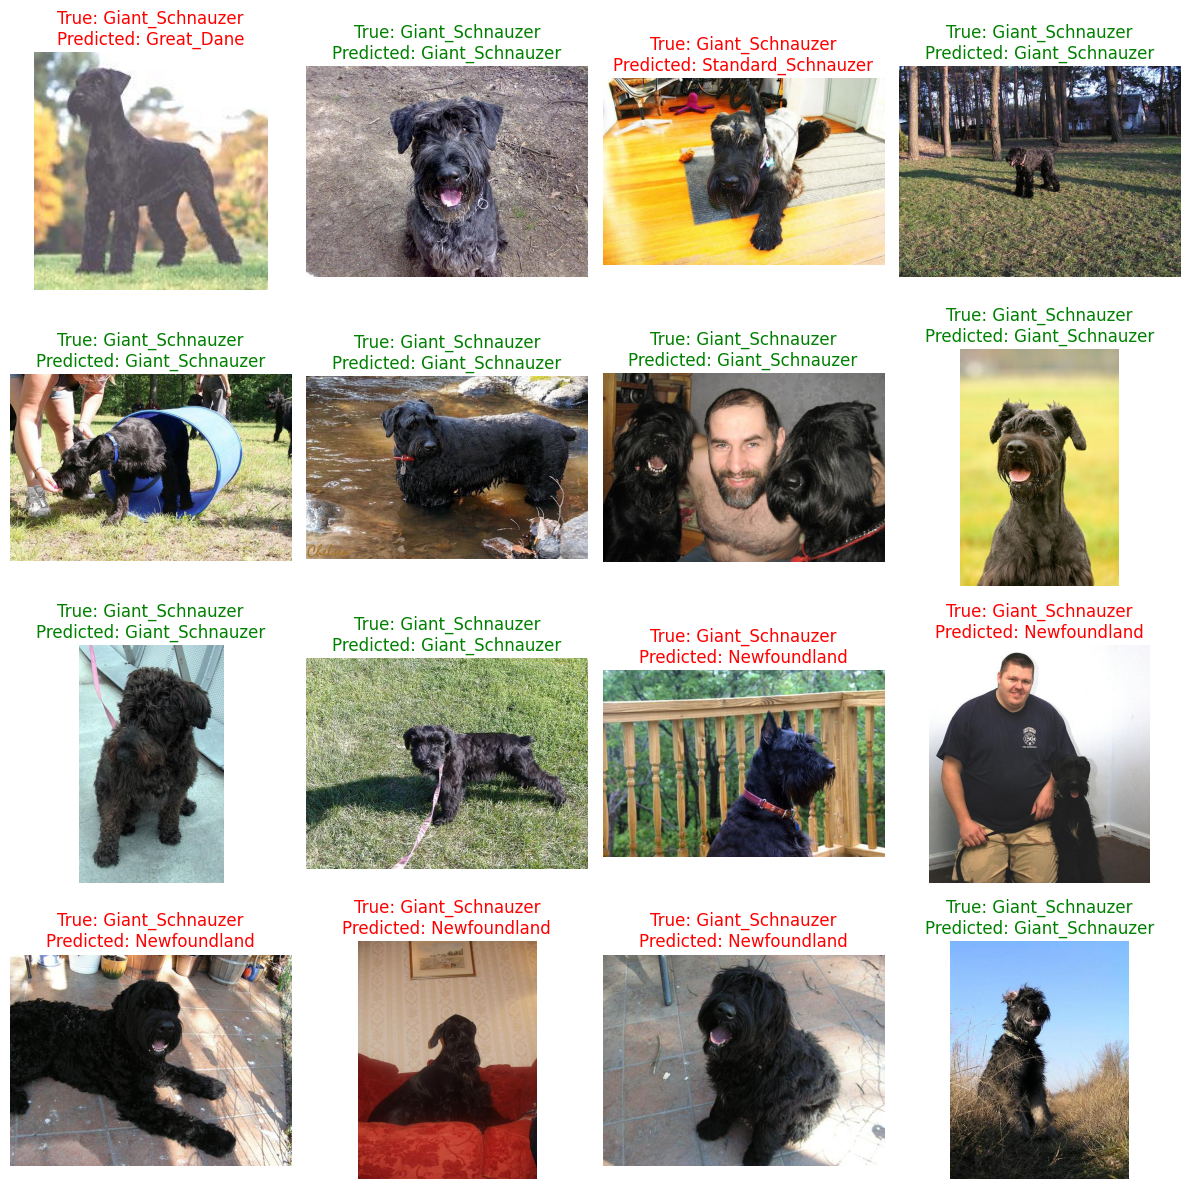

Correctly classified images: 9
Incorrectly classified images: 7


In [8]:
filenames = test_generator.filenames
class_labels_3 = list(test_generator.class_indices.keys())
class_indices = test_generator.class_indices
predicted_class_labels_3 = [class_labels_3[idx] for idx in predicted_labels]

plt.figure(figsize=(12, 12))
correct_count = 0
incorrect_count = 0

for i in range(16):
    img = plt.imread(model_test_dir + '/' + filenames[i])
    
    true_label = class_labels_3[true_labels[i]]
    true_label_clean = true_label.split('-')[1].title()
    predicted_label = predicted_class_labels_3[i]
    predicted_label_clean = predicted_label.split('-')[1].title()

    if true_label == predicted_label:
        color = 'green'
        correct_count += 1
    else:
        color = 'red'
        incorrect_count += 1
    
    plt.subplot(4, 4, i + 1)
    plt.imshow(img)
    plt.title(f'True: {true_label_clean}\nPredicted: {predicted_label_clean}', color=color)
    plt.axis('off')
plt.tight_layout()
plt.show()

print(f"Correctly classified images: {correct_count}")
print(f"Incorrectly classified images: {incorrect_count}")

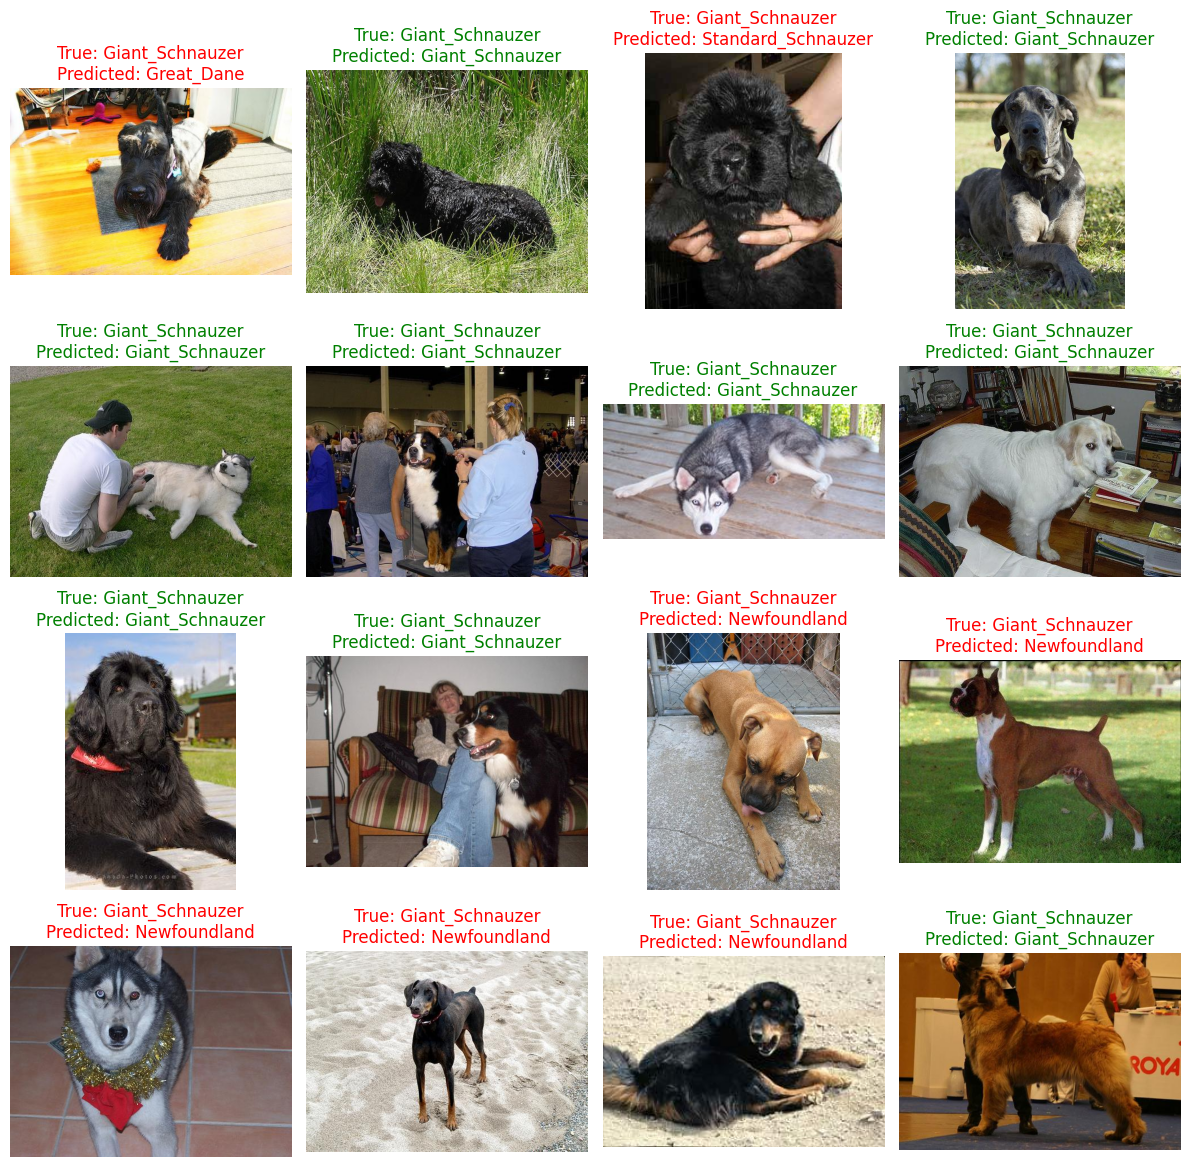

Correctly classified images: 9
Incorrectly classified images: 7


In [9]:
filenames = test_generator.filenames
num_samples = 16

indices = list(range(len(filenames)))
random.seed(42)
# random.seed(77)
random.shuffle(indices)

plt.figure(figsize=(12, 12))

correct_count = 0
incorrect_count = 0

for i in range(num_samples):
    idx = indices[i]
    img = plt.imread(model_test_dir + '/' + filenames[idx])
    
    # true_label = class_labels[true_labels[idx]]
    # predicted_label = predicted_class_labels[idx]

    true_label = class_labels_3[true_labels[i]]
    true_label_clean = true_label.split('-')[1].title()
    predicted_label = predicted_class_labels_3[i]
    predicted_label_clean = predicted_label.split('-')[1].title()

    if true_label == predicted_label:
        color = 'green'
        correct_count += 1
    else:
        color = 'red'
        incorrect_count += 1
    
    plt.subplot(4, 4, i + 1)
    plt.imshow(img)
    plt.title(f'True: {true_label_clean}\nPredicted: {predicted_label_clean}', color=color)
    plt.axis('off')

plt.tight_layout()
plt.show()

print(f"Correctly classified images: {correct_count}")
print(f"Incorrectly classified images: {incorrect_count}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


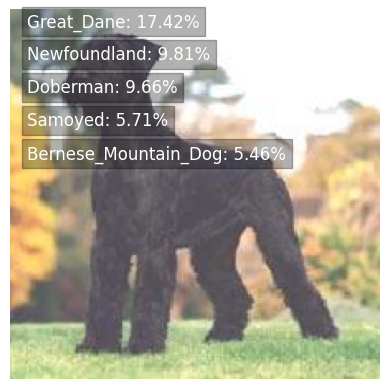

In [10]:
batch_images, _ = next(test_generator) 
img_array = batch_images[0]  

predictions = model.predict(np.expand_dims(img_array, axis=0))

top5_idx = np.argsort(predictions[0])[::-1][:5] 
top5_prob = predictions[0][top5_idx]  
top5_labels = [class_labels[i] for i in top5_idx]  

plt.imshow(img_array)
plt.axis('off')

for i, (label, prob) in enumerate(zip(top5_labels, top5_prob)):
    prob_percent = round(prob * 100, 2)
    plt.text(10, 10 + i * 20, f"{label}: {prob_percent}%", color='white', fontsize=12, bbox=dict(facecolor='black', alpha=0.3))
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
True Label: Standard_Schnauzer
22.54%    Komondor
14.84%    Newfoundland
12.44%    Giant_Schnauzer
6.66%    Standard_Schnauzer
5.97%    Kuvasz


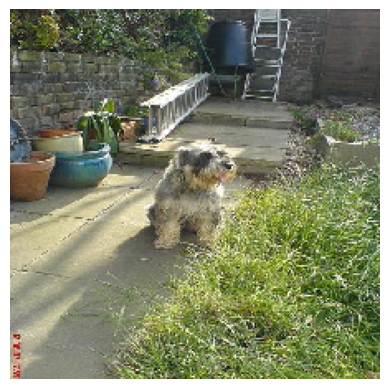

In [11]:
batch_images, batch_labels = next(test_generator)  
random_index = random.randint(0, len(batch_images) - 1)
img_array = batch_images[random_index]
predictions = model.predict(np.expand_dims(img_array, axis=0))


top5_idx = np.argsort(predictions[0])[::-1][:5]  
top5_prob = predictions[0][top5_idx]  
top5_labels = [class_labels[i] for i in top5_idx]  

# true_label = class_labels[np.argmax(batch_labels[0])]
true_label = class_labels[np.argmax(batch_labels[random_index])]  
print(f"True Label: {true_label}")

for label, prob in zip(top5_labels, top5_prob):
    prob = round((prob*100),4)
    print(f"{prob:.2f}%    {label}")
    # print(f"Class: {label}, Probability: {prob:.2f}%")

plt.imshow(img_array)
plt.axis('off')
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


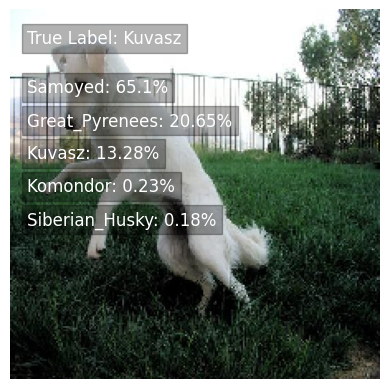

In [12]:
batch_images, batch_labels = next(test_generator) 
img_array = batch_images[0] 
predictions = model.predict(np.expand_dims(img_array, axis=0))

top5_idx = np.argsort(predictions[0])[::-1][:5]  
top5_prob = predictions[0][top5_idx] 
top5_labels = [class_labels[i] for i in top5_idx] 

true_label = class_labels[np.argmax(batch_labels[0])]  

plt.imshow(img_array)
plt.axis('off')

plt.text(10, 20, f"True Label: {true_label}", color='white', fontsize=12, bbox=dict(facecolor='black', alpha=0.3))
for i, (label, prob) in enumerate(zip(top5_labels, top5_prob)):
    prob_percent = round(prob * 100, 2)
    plt.text(10, 50 + i * 20, f"{label}: {prob_percent}%", color='white', fontsize=12, bbox=dict(facecolor='black', alpha=0.3))

plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
True Label: Kuvasz
Class: Komondor, Probability: 100.00%
Class: Newfoundland, Probability: 0.00%
Class: Great_Pyrenees, Probability: 0.00%
Class: Kuvasz, Probability: 0.00%
Class: Giant_Schnauzer, Probability: 0.00%


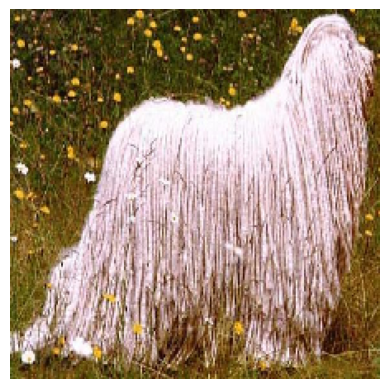

In [13]:
batch_images, batch_labels = next(test_generator)
img_array = batch_images[0] 
predictions = model.predict(np.expand_dims(img_array, axis=0))

top5_idx = np.argsort(predictions[0])[::-1][:5]  
top5_prob = predictions[0][top5_idx]  
top5_labels = [class_labels[i] for i in top5_idx]  
print(f"True Label: {true_label}")
for label, prob in zip(top5_labels, top5_prob):
    prob = round((prob*100),4)
    print(f"Class: {label}, Probability: {prob:.2f}%")

# Visualize the image
plt.imshow(img_array)
plt.axis('off')
plt.show()

In [15]:
predictions = model.predict(test_generator)
predicted_labels = predictions.argmax(axis=1)
true_labels = test_generator.classes
class_indices = test_generator.class_indices
class_labels = list(class_indices.keys())
class_labels = [label.split('-')[1].title() for label in class_labels]

report = classification_report(true_labels, predicted_labels, target_names=class_labels)

print(report)

21/21 ━━━━━━━━━━━━━━━━━━━━ 11s 526ms/step
                            precision    recall  f1-score   support

           Giant_Schnauzer       0.54      0.59      0.57        32
        Standard_Schnauzer       0.67      0.45      0.54        31
                    Kuvasz       0.40      0.20      0.27        30
                  Komondor       0.76      0.94      0.84        31
                Rottweiler       0.88      0.48      0.62        31
                  Doberman       0.67      0.80      0.73        30
Greater_Swiss_Mountain_Dog       0.83      0.29      0.43        34
      Bernese_Mountain_Dog       0.59      0.93      0.72        44
                     Boxer       0.90      0.29      0.44        31
              Bull_Mastiff       0.70      0.88      0.78        32
           Tibetan_Mastiff       0.83      0.61      0.70        31
                Great_Dane       0.58      0.66      0.62        32
             Saint_Bernard       0.84      0.94      0.89        34
     

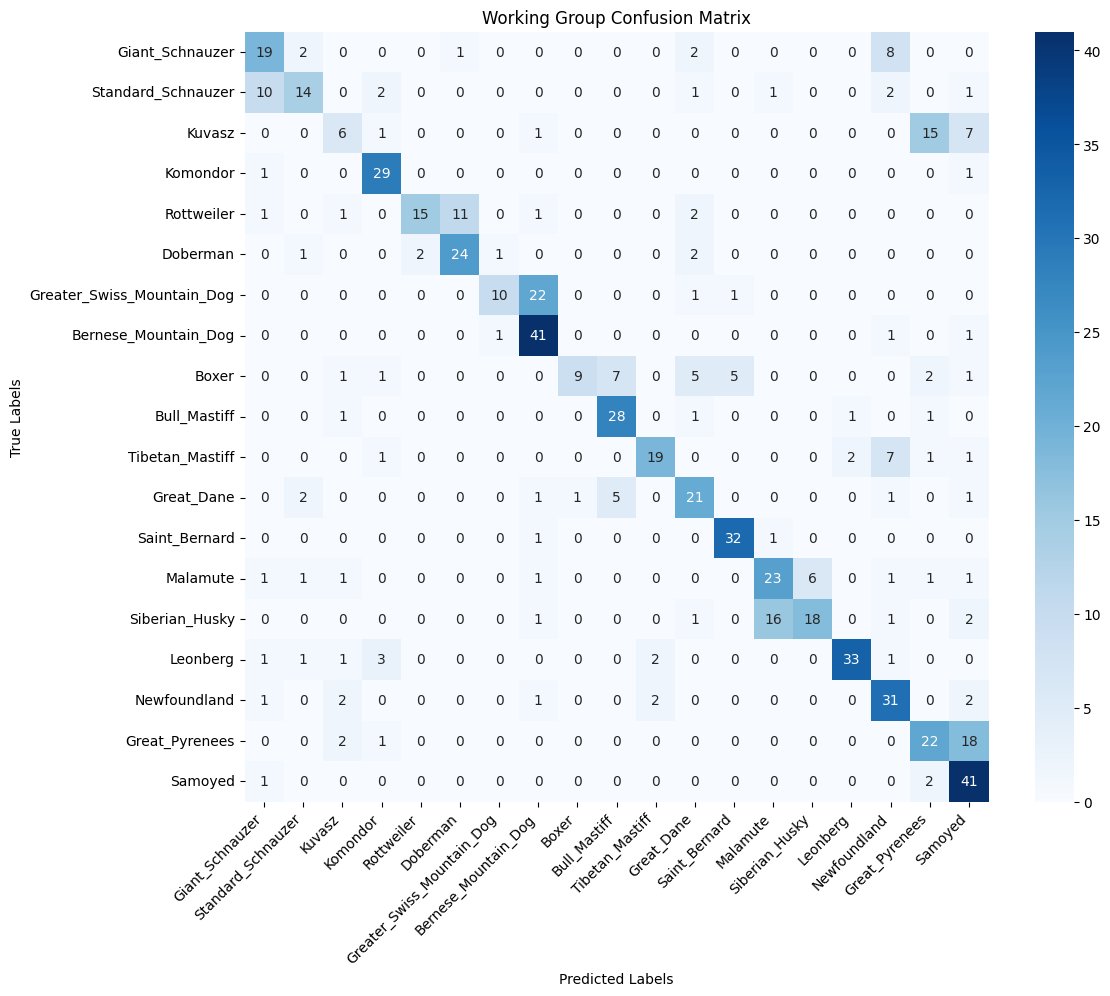

In [16]:
conf_matrix = confusion_matrix(true_labels, predicted_labels)
plt.figure(figsize=(12, 10))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Labels')
plt.xticks(rotation=45, ha = 'right')
plt.ylabel('True Labels')
plt.title('Working Group Confusion Matrix')
plt.show()